In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def get_sheetnames(filename):
    '''
    Load xlsx spreadsheets into a pandas dataframe to obtain sheet names
    
    Input: filepath and name
    Output: a list of sheet names in xlsx workbook
    '''
    df = pd.ExcelFile(filename)
    return df.sheet_names

In [3]:
filenames = ['219-CATTRACKS Fall 2019- February Billing.xlsx', 'CATTRACKS Fall 2018- October Billing.xlsx']
xlsx_sheets = []

xlsx_sheets = [get_sheetnames(filename) for filename in filenames]
# xlsx_sheets


Based on assessment of csv data, most informative sheets in workbook consist of these bus lines:
 'C1 BLUE',
 'C1-GOLD',
 'C2 - EXPRESS',
 'G-Line'

Will only read those sheets into a pandas df and then into a dictionary to keep track of the bus line and its total load data.

Nota bene: Layout of load data in xlsx for bus lines 'C1 BLUE', 'C1-GOLD' and 'C2 - EXPRESS' are the same for both spreadsheets. The last bus line, 'G-Line' will have to be treated differently.

Will begin with analysis of first three bus lines below:


In [4]:
# Will revisit G-Line later
# use_sheets = ['C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS', 'G-Line']
# df_names = ['c1_blue', 'c1_gold', 'c2_exp', 'g_line']

use_sheets = ['C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS']
feb_df_names = ['feb_c1_blue', 'feb_c1_gold', 'feb_c2_exp']
oct_df_names = ['oct_c1_blue', 'oct_c1_gold', 'oct_c2_exp']

In [5]:
file1 = '219-CATTRACKS Fall 2019- February Billing.xlsx'
file2 = 'CATTRACKS Fall 2018- October Billing.xlsx'

feb_dicts = {}
oct_dicts = {}
for i in range(len(feb_df_names)):
    feb_dicts[feb_df_names[i]] = pd.read_excel(file1, use_sheets[i])
    oct_dicts[oct_df_names[i]] = pd.read_excel(file2, use_sheets[i])

# feb_dicts
# oct_dicts

In [6]:
# Want an ordered dictionary since I am using brute means to slice data

collections.OrderedDict(feb_dicts)
collections.OrderedDict(oct_dicts)
feb_dicts.keys()
oct_dicts.keys()

dict_keys(['oct_c1_blue', 'oct_c1_gold', 'oct_c2_exp'])

In [7]:
# Hate that I am doing this brute force, but didn't know how to slice these totals otherwise.
# Can loop through key names, but cannot loop through iloc portion

feb_c1b = feb_dicts['feb_c1_blue'].iloc[4:25, 86:101]
feb_c1g = feb_dicts['feb_c1_gold'].iloc[4:25, 81:95]
feb_c2e = feb_dicts['feb_c2_exp'].iloc[4:19, 106:125]

oct_c1b = oct_dicts['oct_c1_blue'].iloc[4:25, 86:101]
oct_c1g = oct_dicts['oct_c1_gold'].iloc[4:25, 81:95]
oct_c2e = oct_dicts['oct_c2_exp'].iloc[4:19, 106:125]

In [8]:
# Step above removed use of dictionaries. Just pandas dfs now

print(type(feb_c1b), type(oct_c2e))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [9]:
# feb_c1g
# oct_c1b

In [8]:
# Only c1_blue and c1_gold lines have Nans in first column.

nans_lst = [feb_c1g, feb_c1b, oct_c1b, oct_c1g]

for df in nans_lst:
    df.dropna(inplace=True)
#     print(df)

In [9]:
# Columns labeled 'Unnamed: 123' contains Nan in first row. All other values in that column = 0
# No viable data. Remove columns

feb_c2e = feb_c2e.drop(columns=['Unnamed: 123'])
oct_c2e = oct_c2e.drop(columns=['Unnamed: 123'])

# feb_c2e, oct_c2e

In [10]:
# Use similar brute force process to slice G-line data:
# Don't forget to load the spreadsheet first.

file1 = '219-CATTRACKS Fall 2019- February Billing.xlsx'
file2 = 'CATTRACKS Fall 2018- October Billing.xlsx'

feb_g_line = pd.read_excel(file1, 'G-Line')
oct_g_line = pd.read_excel(file2, 'G-Line')

feb_g = feb_g_line.iloc[4:17, 101:119]
oct_g = oct_g_line.iloc[4:17, 91:107]

# feb_g
#, oct_g

In [11]:
# Columns labelled Unnamed: 117 and Unnamed: 105 do not contain data. Remove them
feb_g = feb_g.drop(columns=['Unnamed: 117'])
oct_g = oct_g.drop(columns=['Unnamed: 105'])
# feb_g, oct_g

In [12]:
# Removed all Nans, but dataframes still look really ugly.
# Fix times in first row then fix column headers
# Create a helper function to do this for all 4 lines for both months

def convert_num_to_ints(dframe):
    str_times = [str(int(x)) for x in dframe.iloc[0][1:-1]]
    int_times = [f'{t[:2]}:{t[2:]}' if len(t) > 3 else f'{t[0]}:{t[1:]}' for t in str_times]
    return int_times

feb_dfs = [feb_c1b, feb_c1g, feb_c2e, feb_g]
oct_dfs = [oct_c1b, oct_c1g, oct_c2e, oct_g]

feb_times, oct_times = [], []

for i in range(len(feb_dfs)):
    feb_times.append(convert_num_to_ints(feb_dfs[i]))
    oct_times.append(convert_num_to_ints(oct_dfs[i]))

# feb_times, oct_times

In [13]:
first_col = ['C1-BLUE', 'C1-GOLD', 'C2-EXPRESS', 'G-LINE']

for i in range(len(feb_times)):
    feb_times[i].append('Total')
    oct_times[i].append('Total')
    feb_times[i].insert(0, first_col[i])
    oct_times[i].insert(0, first_col[i])

# print(feb_times, oct_times)

In [16]:
pd.Series(feb_times[0])

0     C1-BLUE
1        5:45
2        7:04
3        8:43
4       10:02
5       11:21
6       13:00
7       14:19
8       15:58
9       17:17
10      18:36
11      20:15
12      21:34
13      23:28
14      Total
dtype: object

In [14]:
# Use df.set_axis() with axis=1 and inplace=False (to return a copy).

feb_c1b2 = feb_c1b.set_axis(feb_times[0], axis=1, inplace=False)
feb_c1b2 = feb_c1b2[1:]

feb_c1g2 = feb_c1g.set_axis(feb_times[1], axis=1, inplace=False)
feb_c1g2 = feb_c1g2[1:]

feb_c2e2 = feb_c2e.set_axis(feb_times[2], axis=1, inplace=False)
feb_c2e2 = feb_c2e2[1:]

feb_g2 = feb_g.set_axis(feb_times[3], axis=1, inplace=False)
feb_g2 = feb_g2[1:]

In [15]:
feb_c1b2.set_index('C1-BLUE', inplace=True)
feb_c1g2.set_index('C1-GOLD', inplace=True)
feb_c2e2.set_index('C2-EXPRESS', inplace=True)
feb_g2.set_index('G-LINE', inplace=True)

In [19]:
feb_g2

,5:40,6:47,8:14,9:21,10:28,11:55,13:02,14:09,15:36,16:43,17:50,19:17,20:24,21:31,22:38,Total
G-LINE,,,,,,,,,,,,,,,,
"Village Apts ""R"" Street",16.0,66.0,278,196.0,137.0,97,49.0,75,30.0,58.0,25.0,14.0,5.0,0.0,0.0,1046
El Redondo,9.0,161.0,296,313.0,204.0,116,105.0,20,40.0,39.0,9.0,7.0,9.0,1.0,0.0,1329
Compass Pointe,23.0,100.0,210,244.0,165.0,96,76.0,43,34.0,28.0,16.0,8.0,1.0,1.0,0.0,1045
Merced College,5.0,7.0,19,37.0,37.0,4,19.0,24,7.0,5.0,4.0,3.0,0.0,0.0,0.0,171
Ironstone,15.0,29.0,63,40.0,32.0,26,11.0,11,13.0,2.0,1.0,1.0,0.0,0.0,0.0,244
Arrow Wood Dr.,13.0,61.0,128,131.0,89.0,63,122.0,48,53.0,7.0,15.0,7.0,7.0,3.0,0.0,747
Muir Pass,10.0,19.0,5,29.0,122.0,54,220.0,150,105.0,208.0,78.0,53.0,24.0,0.0,0.0,1077
Scholars/Emigrant Pass,11.0,16.0,3,12.0,30.0,22,42.0,46,33.0,57.0,36.0,20.0,3.0,0.0,0.0,331
Amtrak,2.0,2.0,9,1.0,7.0,15,2.0,32,9.0,20.0,4.0,3.0,10.0,0.0,0.0,116


In [20]:
'''
Use vi editor to change all occurrences of 'feb' to 'oct' for commands in this cell and next cell
In command mode, used:
:%s/feb/oct/g
'''

oct_c1b2 = oct_c1b.set_axis(oct_times[0], axis=1, inplace=False)
oct_c1b2 = oct_c1b2[1:]

oct_c1g2 = oct_c1g.set_axis(oct_times[1], axis=1, inplace=False)
oct_c1g2 = oct_c1g2[1:]

oct_c2e2 = oct_c2e.set_axis(oct_times[2], axis=1, inplace=False)
oct_c2e2 = oct_c2e2[1:]

oct_g2 = oct_g.set_axis(oct_times[3], axis=1, inplace=False)
oct_g2 = oct_g2[1:]

In [21]:
oct_c1b2.set_index('C1-BLUE', inplace=True)
oct_c1g2.set_index('C1-GOLD', inplace=True)
oct_c2e2.set_index('C2-EXPRESS', inplace=True)
oct_g2.set_index('G-LINE', inplace=True)

In [22]:
oct_g2

,6:00,7:07,8:34,9:41,10:48,12:15,13:22,14:29,15:56,17:03,18:10,19:17,20:24,Total
G-LINE,,,,,,,,,,,,,,
"Village Apts ""R"" Street",13.0,8.0,49,27.0,10.0,29,9.0,11,2.0,4.0,0.0,1.0,5.0,168
El Redondo,2.0,127.0,199,123.0,96.0,74,37.0,39,34.0,29.0,14.0,10.0,0.0,784
Compass Pointe,2.0,66.0,165,71.0,59.0,64,26.0,50,32.0,21.0,2.0,4.0,1.0,563
Merced College,5.0,6.0,38,37.0,25.0,15,4.0,19,26.0,2.0,4.0,12.0,2.0,195
Ironstone,11.0,39.0,88,72.0,42.0,17,28.0,6,14.0,5.0,3.0,2.0,1.0,328
Arrow Wood Dr.,19.0,76.0,269,201.0,155.0,61,176.0,56,72.0,14.0,24.0,20.0,2.0,1145
Muir Pass,16.0,32.0,23,43.0,110.0,69,193.0,157,104.0,168.0,98.0,74.0,56.0,1143
Scholars/Emigrant Pass,16.0,25.0,1,26.0,35.0,15,59.0,44,46.0,72.0,65.0,13.0,21.0,438
Amtrak,1.0,16.0,29,6.0,6.0,35,4.0,29,13.0,32.0,27.0,13.0,14.0,225


In [23]:
# Check that these are the columns to plot in a bar graph
# Column index versus last column

print(feb_c1b2.index)
feb_c1b2.iloc[:, -1]

Index(['Granville Apts', 'Walmart', 'Meadows/Olivewood', 'Alexander & "G" St',
       'Rite Aid/Walgreen', 'El Portal Plaza', 'Mercy Hospital',
       'Arrow Wood Dr', 'Muir Pass', 'Scholars/Emigrant',
       'TriCol/Mercy Hospital', 'El Portal Plaza/"G" St', '"G" St & Alexander',
       'Meadows/Olivewood', 'Walmart', 'Granville Apts', 'TOTAL'],
      dtype='object', name='C1-BLUE')


C1-BLUE
Granville Apts             251
Walmart                     27
Meadows/Olivewood          160
Alexander & "G" St         220
Rite Aid/Walgreen          253
El Portal Plaza            210
Mercy Hospital              19
Arrow Wood Dr              937
Muir Pass                 1893
Scholars/Emigrant          223
TriCol/Mercy Hospital        7
El Portal Plaza/"G" St      16
"G" St & Alexander          32
Meadows/Olivewood           18
Walmart                     38
Granville Apts               0
TOTAL                     4304
Name: Total, dtype: object

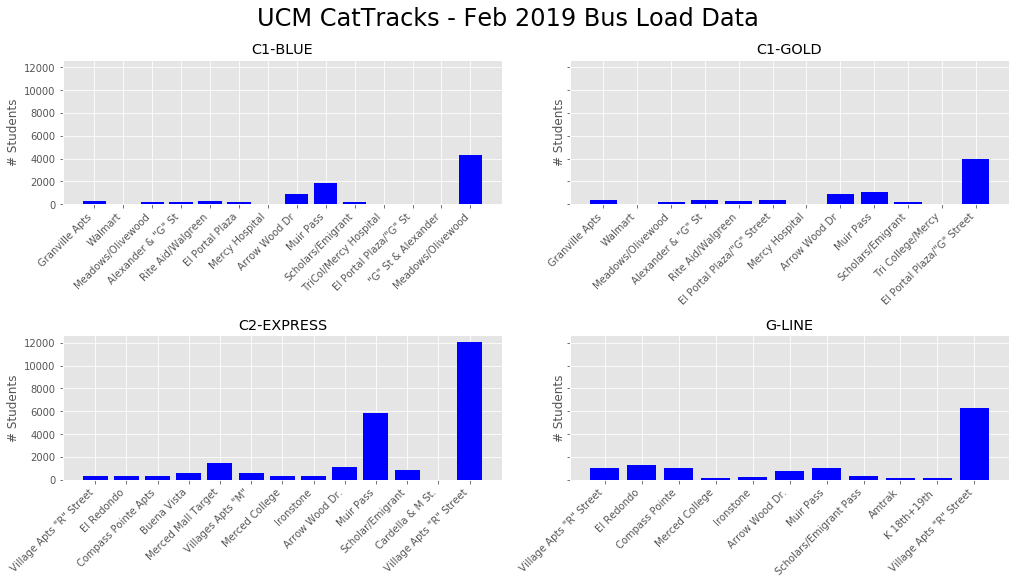

In [24]:
feb_dfs = [feb_c1b2, feb_c1g2, feb_c2e2, feb_g2]
first_col = ['C1-BLUE', 'C1-GOLD', 'C2-EXPRESS', 'G-LINE']

fig, axs = plt.subplots(2,2, figsize = (14,8), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(feb_dfs[i].index, feb_dfs[i].iloc[:, -1], color='blue')
    ax.set_xticklabels(labels=feb_dfs[i].index, rotation=45, ha='right')
    ax.set_title(first_col[i])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Feb 2019 Bus Load Data', fontsize=24)
fig.savefig('2019-feb-plot.png')

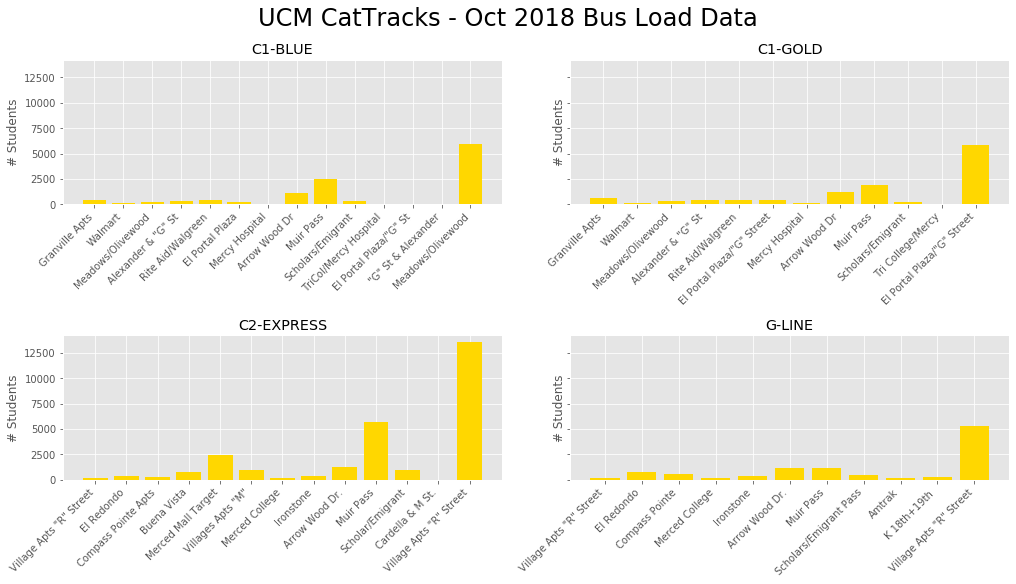

In [25]:
oct_dfs = [oct_c1b2, oct_c1g2, oct_c2e2, oct_g2]

fig, axs = plt.subplots(2,2, figsize = (14,8), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(oct_dfs[i].index, oct_dfs[i].iloc[:, -1], color='gold')
    ax.set_xticklabels(labels=oct_dfs[i].index, rotation=45, ha='right')
    ax.set_title(first_col[i])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Oct 2018 Bus Load Data', fontsize=24)
fig.savefig('2018-oct-plot.png')

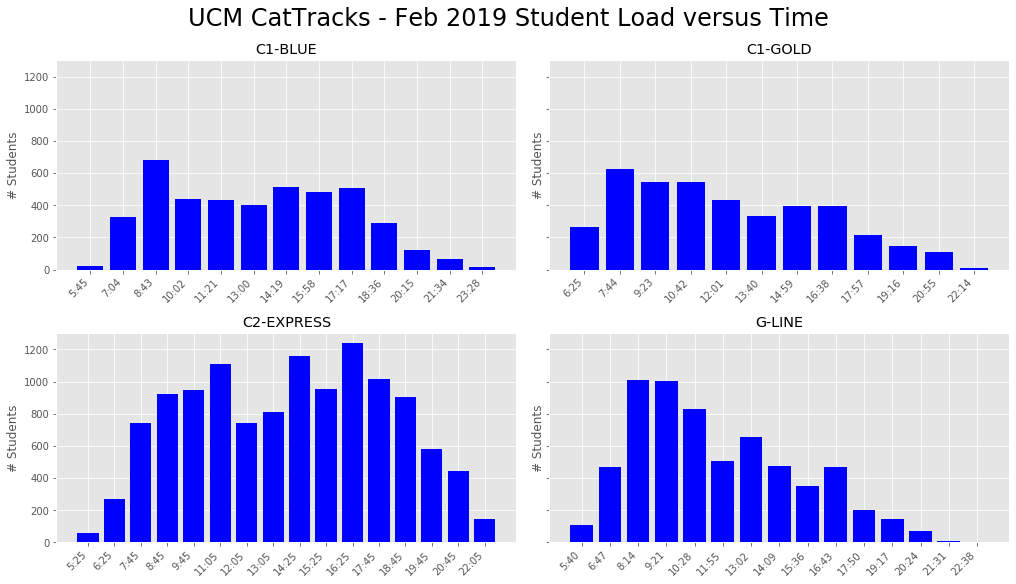

In [26]:
feb_dfs = [feb_c1b2, feb_c1g2, feb_c2e2, feb_g2]

fig, axs = plt.subplots(2,2, figsize = (14,8), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(feb_dfs[i].columns[:-1], feb_dfs[i].iloc[-1, :-1], color='blue')
    ax.set_xticklabels(labels=feb_dfs[i].columns[:-1], rotation=45, ha='right')
    ax.set_title(first_col[i])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Feb 2019 Student Load versus Time', fontsize=24)
fig.savefig('2019-feb-time.png')

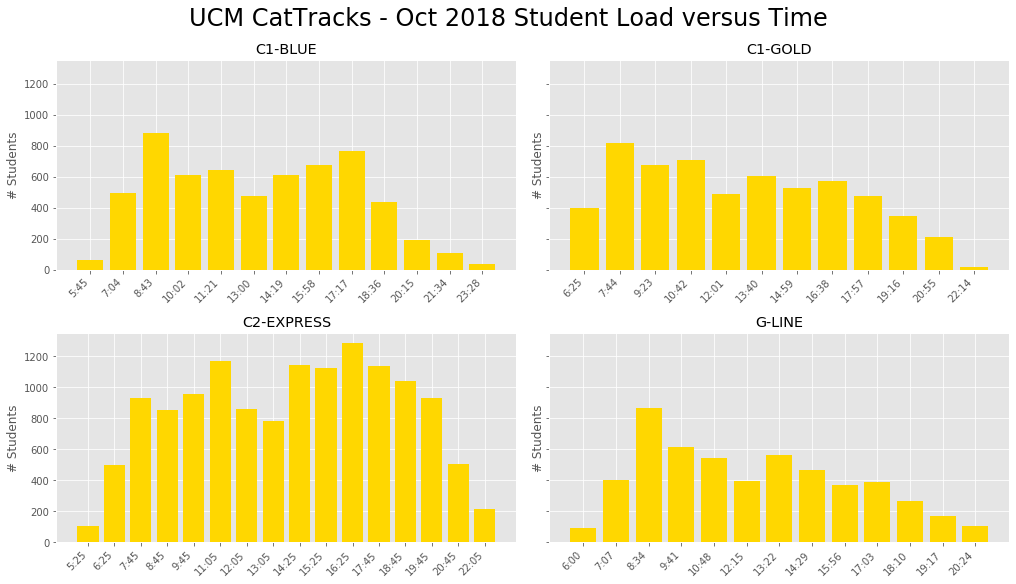

In [27]:
oct_dfs = [oct_c1b2, oct_c1g2, oct_c2e2, oct_g2]

fig, axs = plt.subplots(2,2, figsize = (14,8), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(oct_dfs[i].columns[:-1], oct_dfs[i].iloc[-1, :-1], color='gold')
    ax.set_xticklabels(labels=oct_dfs[i].columns[:-1], rotation=45, ha='right')
    ax.set_title(first_col[i])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Oct 2018 Student Load versus Time', fontsize=24)
fig.savefig('2018-oct-time.png')